# Test Recipe Selection 

In this notebook I will do some validation on the recipe selection methodology.

In [48]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [41]:
selection_files = os.listdir("/media/michael/Delta/Data/Data_Science_Masters/MSDS_498/recipe_samples/")
all_data = []

for curr_file_name in selection_files:
    sample_size, quality_weight = re.findall(r"[\d\.]+", curr_file_name.replace(".parquet", ""))

    curr_data = pd.read_parquet("/media/michael/Delta/Data/Data_Science_Masters/MSDS_498/recipe_samples/" + curr_file_name)
    curr_data['sample_size'] = sample_size
    curr_data['quality_weight'] = quality_weight
    all_data.append(curr_data)

sample_compare = pd.concat(all_data)
sample_compare

,id,density_score,quality_index,selection_weight,selection_probability,sample_size,quality_weight
8,42198,-0.799106,0.494975,0.465202,0.000007,50000,5
14,23933,-1.303812,0.916667,0.684842,0.000010,50000,5
22,37073,0.114302,0.474342,0.379758,0.000005,50000,5
25,59952,1.785655,0.316228,0.172830,0.000002,50000,5
26,67664,-2.277501,0.916667,0.766682,0.000011,50000,5
...,...,...,...,...,...,...,...
193655,207459,0.606043,0.335410,0.268851,0.000004,50000,3
193656,471844,0.045537,0.316228,0.319668,0.000005,50000,3
193661,267661,1.058700,0.474342,0.265228,0.000004,50000,3
193680,367912,-0.795401,0.547723,0.474800,0.000007,50000,3


In [75]:
sample_agg['quality_weight'].unique()

array(['0.5', '1', '10', '100', '2', '20', '3', '4', '5', '50'],
      dtype=object)

In [79]:
[str(y) for y in sorted([float(x) for x in sample_agg['quality_weight'].unique()])]

['0.5', '1.0', '2.0', '3.0', '4.0', '5.0', '10.0', '20.0', '50.0', '100.0']

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sample_agg = sample_compare.groupby(['sample_size', 'quality_weight']).agg({
    'density_score': "mean",
    'quality_index': "mean"
}).reset_index()
sample_agg['sample_size'] = sample_agg['sample_size'].astype(int)
sample_agg['quality_weight'] = pd.Categorical(sample_agg['quality_weight'], categories=['0.5', '1', '2', '3', '4', '5', '10', '20', '50', '100'], ordered=True)
sample_agg

,sample_size,quality_weight,density_score,quality_index
0,1000,0.5,-0.344192,0.422236
1,1000,1,-0.372977,0.433541
2,1000,10,-0.173513,0.499142
3,1000,100,0.013640,0.534567
4,1000,2,-0.308653,0.455073
...,...,...,...,...
85,50000,20,-0.088797,0.500909
86,50000,3,-0.235982,0.452556
87,50000,4,-0.228228,0.461336
88,50000,5,-0.204571,0.466243


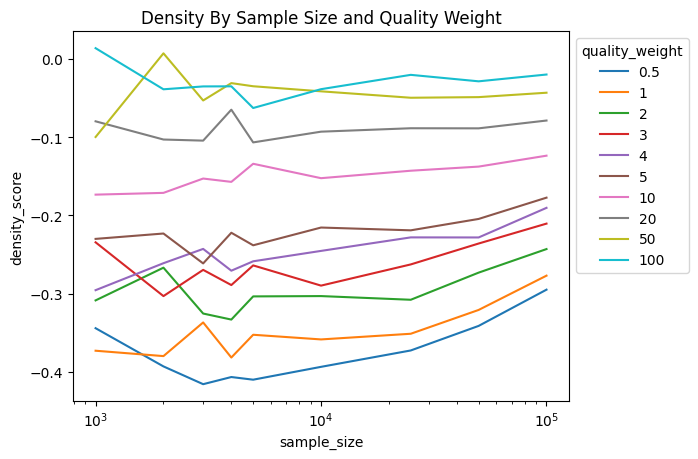

In [85]:
ax = sns.lineplot(
    sample_agg,
    x="sample_size",
    y='density_score',
    hue='quality_weight'
)
plt.title("Density By Sample Size and Quality Weight")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xscale("log")
plt.show()

In [57]:
sorted(sample_agg['quality_weight'].unique())

[0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 20.0, 50.0, 100.0]

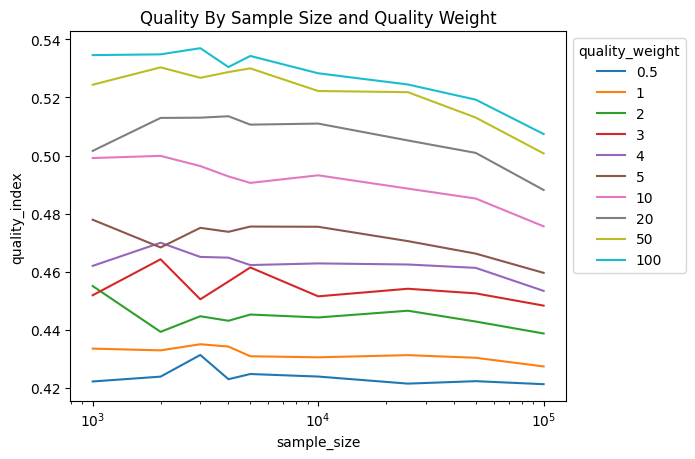

In [86]:
ax = sns.lineplot(
    sample_agg,
    x="sample_size",
    y='quality_index',
    hue='quality_weight'
)
plt.title("Quality By Sample Size and Quality Weight")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xscale("log")
plt.show()

# Final Dataset Output

In [43]:
SELECTED_SAMPLE_SIZE = 5000
SELECTED_QUALITY_WEIGHT = 5

output_data = pd.read_parquet(f"/media/michael/Delta/Data/Data_Science_Masters/MSDS_498/recipes_embedded.parquet")
output_data = output_data[[x for x in output_data.columns if "_embedding_" not in x]]
selected_recipes = pd.read_parquet(f"/media/michael/Delta/Data/Data_Science_Masters/MSDS_498/recipe_samples/recipes_sample_n={SELECTED_SAMPLE_SIZE}_weight={SELECTED_QUALITY_WEIGHT}.parquet")

output_data = output_data.merge(selected_recipes, on=['id'], how='inner')
output_data


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,rating_count_1,rating_count_2,rating_count_3,rating_count_4,rating_count_5,rating_count_total,density_score,quality_index,selection_weight,selection_probability
0,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,...,0,0,0,2,15,19,-0.398062,0.842105,0.577378,0.000008
1,der wiener schnitzel style chili dog sauce,523359,55,2000414501,2015-08-27,"['60-minutes-or-less', 'time-to-make', 'prepar...","[259.7, 23.0, 18.0, 31.0, 34.0, 28.0, 4.0]",16,['in a large size dutch oven or large size dee...,this was the best chili dog ever invented! i l...,...,0,0,0,0,0,1,0.365239,0.000000,0.159322,0.000002
2,bake in oozy bread,209203,35,86764,2007-02-04,"['bacon', '60-minutes-or-less', 'time-to-make'...","[1063.2, 126.0, 155.0, 74.0, 34.0, 168.0, 21.0]",14,"['preheat oven to 375f', 'place a medium skill...",saw this on the rachael ray show while resting...,...,2,0,1,0,0,3,-1.641220,0.000000,0.327967,0.000005
3,crab noodle bowl,216945,7,430471,2007-03-15,"['15-minutes-or-less', 'time-to-make', 'course...","[402.9, 17.0, 18.0, 124.0, 42.0, 23.0, 18.0]",5,"['in large non-stick pan , cook veggies on med...",this came out of a need to use some extra imit...,...,0,0,1,1,0,2,-0.972968,0.111803,0.318785,0.000005
4,glazed meatloaf,243785,70,260629,2007-08-01,"['time-to-make', 'course', 'main-ingredient', ...","[310.7, 28.0, 9.0, 27.0, 48.0, 35.0, 3.0]",5,"['preheat oven to 375 degrees', 'in large bowl...",this is a very simple way to liven up your eve...,...,0,0,0,1,2,3,0.186309,0.456435,0.366181,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,zucchini blueberry bread,263560,95,508997,2007-11-06,"['time-to-make', 'preparation', 'for-large-gro...","[311.6, 17.0, 137.0, 10.0, 9.0, 13.0, 16.0]",11,"['preheat oven to 350f', 'in a large bowl , co...",this is my lightened version of recipe #70287....,...,0,0,0,1,1,2,0.197879,0.335410,0.314347,0.000004
4996,zucchini feta salad,149932,25,200862,2006-01-01,"['30-minutes-or-less', 'time-to-make', 'course...","[289.5, 34.0, 41.0, 22.0, 17.0, 36.0, 5.0]",3,['arrange the zucchini slices and mushrooms on...,this greek-style salad is often on the menu at...,...,0,0,0,0,1,1,-0.214081,0.316228,0.340911,0.000005
4997,zuccotto,175129,68,94087,2006-06-27,"['time-to-make', 'course', 'main-ingredient', ...","[398.5, 56.0, 24.0, 1.0, 14.0, 81.0, 5.0]",24,"['cut cake in slices 1 cm thick , cut each sli...",from australian woman's weekly italian cooking...,...,0,0,0,0,1,1,-0.120383,0.316228,0.333035,0.000005
4998,zuppa inglese della nonna,456931,26,1680722,2011-05-22,"['30-minutes-or-less', 'time-to-make', 'course...","[393.0, 23.0, 115.0, 12.0, 19.0, 31.0, 18.0]",20,"['in a pot wish together very well egg yolks ,...",this delicious light dessert is very similar t...,...,0,0,0,0,1,1,-1.336536,0.316228,0.435254,0.000006


In [44]:
output_data = output_data.sort_values(['quality_index', "selection_weight"], ascending=[False, False])
output_data['row_num'] = np.arange(len(output_data)) + 1
output_data

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,...,rating_count_2,rating_count_3,rating_count_4,rating_count_5,rating_count_total,density_score,quality_index,selection_weight,selection_probability,row_num
2930,minty onion tomato salad,186716,135,107583,2006-09-18,"['time-to-make', 'course', 'main-ingredient', ...","[42.2, 0.0, 19.0, 0.0, 3.0, 0.0, 3.0]",1,"['layer ingredients , cover and chill 2 hours ...",this is from an old booklet put out by the wal...,...,0,0,0,10,10,-1.653081,1.0,0.749220,1.065792e-05,1
138,apple butterflies,142820,15,169969,2005-10-26,"['15-minutes-or-less', 'time-to-make', 'course...","[206.1, 25.0, 24.0, 6.0, 16.0, 16.0, 3.0]",12,['spoon 2 tablespoons peanut butter onto cente...,your kids will fly right home for these delici...,...,0,0,0,11,11,-1.625811,1.0,0.746928,1.062532e-05,2
4627,tomato and cheese quesadilla,237022,10,329769,2007-06-26,"['15-minutes-or-less', 'time-to-make', 'course...","[220.3, 13.0, 14.0, 12.0, 18.0, 22.0, 9.0]",8,"['place one tortilla on a plate', 'spread the ...",a very easy to make lunch. if following a glut...,...,0,0,0,13,13,-1.507699,1.0,0.737000,1.048410e-05,3
117,angelic strawberry frozen yogurt,66304,120,37449,2003-07-07,"['weeknight', 'time-to-make', 'course', 'main-...","[125.2, 3.0, 94.0, 1.0, 6.0, 9.0, 7.0]",16,['put strawberries and sugar in the freezer ba...,this is a great way to have strawberries and g...,...,0,0,0,11,11,-1.406669,1.0,0.728508,1.036330e-05,4
4862,weight watchers apple and carrot salad,283833,45,171790,2008-02-03,"['60-minutes-or-less', 'time-to-make', 'course...","[87.1, 1.0, 55.0, 7.0, 1.0, 0.0, 7.0]",3,['combine first 3 ingredients in a large bowl'...,core or only 1 point.\r\nuse purchased matchst...,...,0,0,0,16,16,-1.320249,1.0,0.721245,1.025997e-05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,desert style oatmeal,181964,6,318265,2006-08-15,"['15-minutes-or-less', 'time-to-make', 'course...","[325.4, 18.0, 2.0, 15.0, 53.0, 10.0, 9.0]",6,['boil water with all the spices except black ...,even if you carry all the ingredients in your ...,...,0,0,0,0,1,1.182707,0.0,0.090612,1.288994e-06,4996
313,baked chicken with pineapples and mushrooms,293858,130,599568,2008-03-24,"['time-to-make', 'course', 'main-ingredient', ...","[161.0, 12.0, 37.0, 7.0, 16.0, 9.0, 4.0]",9,"['in a bowl , combine pineapple juice with the...","i was in a bit of tropical mood, but we don't ...",...,0,0,0,0,1,1.353010,0.0,0.076298,1.085370e-06,4997
3480,pollo con naranjas chicken with oranges,160666,75,182809,2006-03-20,"['lactose', 'time-to-make', 'course', 'main-in...","[1002.2, 50.0, 40.0, 19.0, 292.0, 29.0, 8.0]",9,"['sprinkle chicken with salt , pepper , cinnam...",this recipe developed over time with feed-back...,...,0,0,0,0,1,1.383102,0.0,0.073769,1.049390e-06,4998
4526,texas tater tots casserole,296611,65,753664,2008-04-05,"['time-to-make', 'course', 'main-ingredient', ...","[513.0, 42.0, 8.0, 63.0, 46.0, 59.0, 15.0]",9,"['heat oven to 375 degrees', 'cook beef , onio...",i got this from the betty crocker casseroles &...,...,0,1,0,0,1,1.396227,0.0,0.072666,1.033698e-06,4999


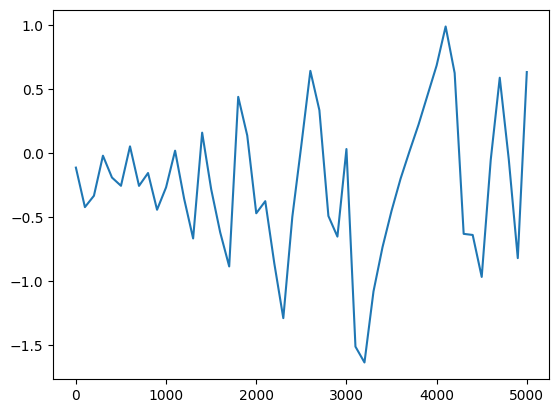

In [52]:
temp_data = output_data.copy()
temp_data['quality_group'] = temp_data['row_num'].round(-2)
temp_data_agg = temp_data.groupby(['quality_group']).agg({
    "density_score": "mean",
    "quality_index": "mean"
}).reset_index()
temp_data_agg
plt.plot(temp_data_agg['quality_group'], temp_data_agg['density_score'])
plt.show()


In [70]:
keywords = ['spaghetti', 'pizza', 'pancake', 'omelette', 'cookies', 'pork chop', 'pie', 'chicken thigh', 'lasagna', 'cake', 'marsala', 'casserole', 'pot roast', 'salmon']

for curr_keyword in keywords:
    print(f"{curr_keyword}: {output_data['name'].str.contains(curr_keyword).sum()}")

spaghetti: 30
pizza: 54
pancake: 41
omelette: 6
cookies: 149
pork chop: 33
pie: 124
chicken thigh: 2
lasagna: 20
cake: 300
marsala: 5
casserole: 108
pot roast: 10
salmon: 56


In [71]:
output_data.to_parquet(f"/media/michael/Delta/Data/Data_Science_Masters/MSDS_498/final_recipe_sample.parquet", index=False)